# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA


En este notebook comenzare a trabajar con este dataset para los años 2017, 2018 y 2019 del Flujo Vehicular por Unidades de Peaje AUSA.

Para el proyecto, vamos a trabajar en un modelo basado en los datos de la autopista Illia, pago en Efectivo.

#### Trabajare con la Exploración de datos, para identificar y entender los datos.


#### Analizare los Componentes de la serie de tiempo.


#### Trabajare en la Predicción a Futuro.


#### Por ultimo, dejare algunas conclusiones sobre como podria mejorar el modelo y que podria hacer para mejorarlo.


### 1. Preparación del Dataset

In [894]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [895]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [896]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [897]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [898]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [899]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [900]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [901]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [902]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [903]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [904]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha,infer_datetime_format=True) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [905]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [906]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


**Anàlisis exploratorio de datos**

Vamos a analizar algunos de los atributos que tenemos en el data set para entender la distribuciòn de sus datos.

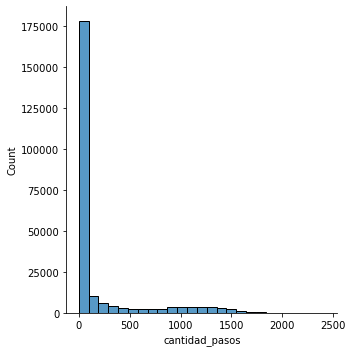

In [907]:
sns.displot(dataset.cantidad_pasos,bins=25)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar, como gran cantidad de los datos, contienen meos de 500 pasos.

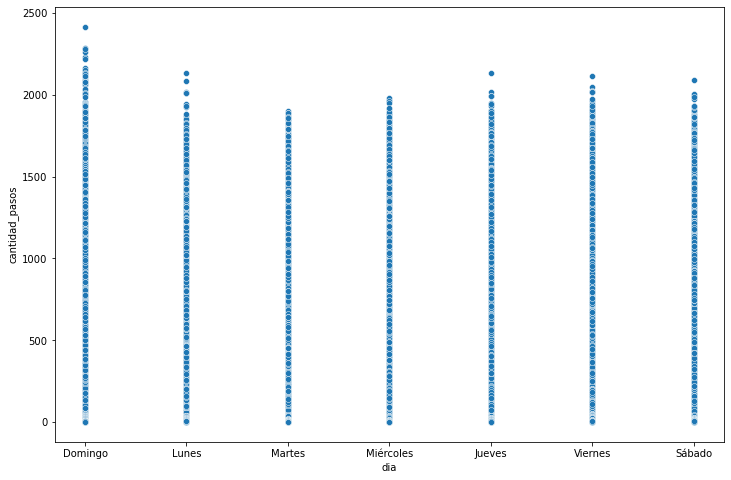

In [908]:
plt.figure(figsize= (12,8))
sns.scatterplot(data=dataset,x='dia',y='cantidad_pasos')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos visualizar que los dìas Domingos es donde se ven los mayores picos de la cantidad de pasos y tiene sentido dado que el Domingo la gente suele volver para comenzar la semana.

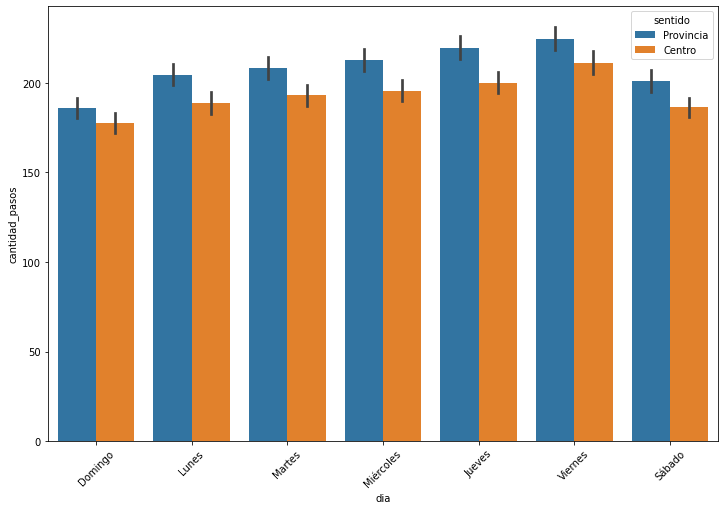

In [909]:
plt.figure(figsize= (12,8))
sns.barplot(data=dataset,x='dia',y='cantidad_pasos',hue='sentido')
plt.xticks(rotation = 45)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar los promedios por hora de cada dìa teniendo en cuenta los sentidos.

<Figure size 1440x360 with 0 Axes>

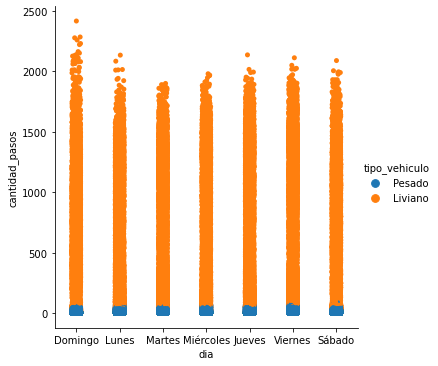

In [910]:
plt.figure(figsize= (20,5))
sns.catplot(data=dataset,x='dia',y='cantidad_pasos',hue='tipo_vehiculo')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

<Figure size 1440x360 with 0 Axes>

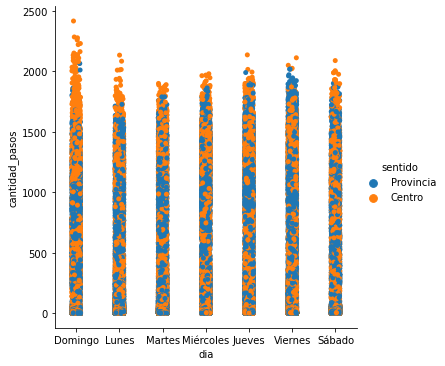

In [911]:
plt.figure(figsize= (20,5))
sns.catplot(data=dataset,x='dia',y='cantidad_pasos',hue='sentido')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar que en los picos del Domingo por ejemplo, la gente vuelve al Centro lo cual es logico luego de pasar el Fin de semana o ese mismo dìa afuera. Pero se puede notar como predomina el color azul.

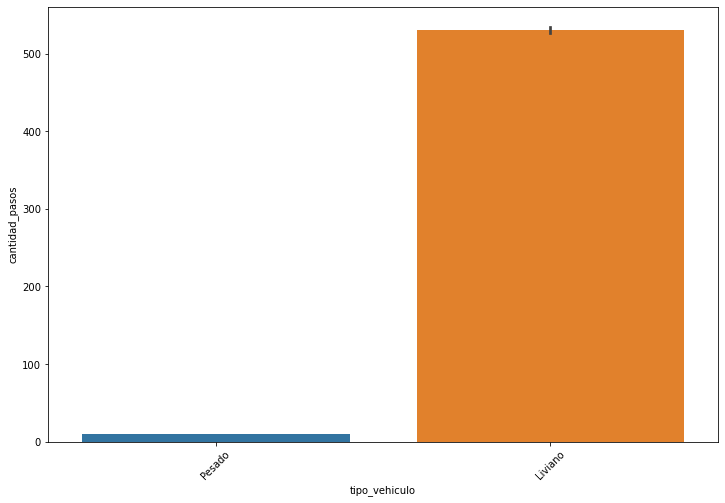

In [912]:
plt.figure(figsize= (12,8))
sns.barplot(data=dataset,x='tipo_vehiculo',y='cantidad_pasos')
plt.xticks(rotation = 45)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar como la mayorìa de los pasos se da en vehìculos del tipo Liviano, que son los vehìculos màs frecuentes.

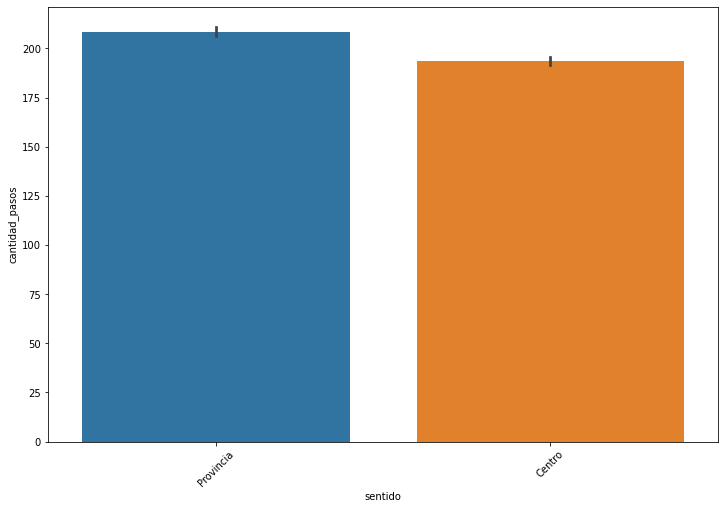

In [913]:
plt.figure(figsize= (12,8))
sns.barplot(data=dataset,x='sentido',y='cantidad_pasos')
plt.xticks(rotation = 45)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar que si bien hay gran paridad entre ambos sentidos, hay una mayorìa que se redirige para la zona de Provincia en promedio por hora, esto se puede dar dado que hay mucha gente que vive en provincia y viene a trabajar al centro, pero la diferencia se da en que hay mucha gente del Centro que se redirige a Provincia por ejemplo a pasar el fin de semana. Como estamos tomando el peaje de la ILLIA tambien podemos concluir que mucha gente que se va del Centro pasa por dicho peaje, pero cuando vuelve a la ciudad entra por otro lado, y no pasa por dicho peaje.

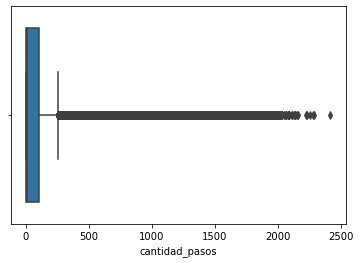

In [914]:
sns.boxplot(x=dataset['cantidad_pasos'])
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Analizò la ùnica variable numèrica que tengo en el data set para tener una nociòn mas profunda sobre dicho atributo.

In [915]:
print(dataset.groupby(by=['dia']).sum().sort_values('cantidad_pasos'))

           cantidad_pasos
dia                      
Domingo           5791961
Sábado            6441715
Lunes             6691387
Martes            6865551
Miércoles         7125526
Jueves            7302169
Viernes           7647272


Analizamos la cantidad de pasos por dìa de la Semana, como vimos en los gràficos anteriores, vemos que el Jueves y Viernes son los dìas en que la gente se moviliza con mayor frecuencia que los demas dias.

In [916]:
print(dataset.groupby(by=['dia']).mean().sort_values('cantidad_pasos'))

           cantidad_pasos
dia                      
Domingo         181.42968
Sábado          193.14908
Lunes           195.97549
Martes          199.95780
Miércoles       203.55738
Jueves          209.14730
Viernes         217.27674


Podemos visualizar el promedio por hora de cada dìa, donde el Viernes tiene el mayor promedio, siendo lògico dado que empieza el Fin de semana.

In [917]:
print(dataset.groupby(by=['sentido']).sum().sort_values('cantidad_pasos'))

           cantidad_pasos
sentido                  
Provincia        23158215
Centro           24707366


Podemos visualizar que hay mas autos que se dirigen en direccion hacia el centro, a diferencia de lo que hemos visto antes de que en promedio por hora, era mayor el sentido de Provincia.

Tener en cuenta que se analizo una porcion de los datos, del peaje de la Illia y que la forma de pago fue efectivo. Dentro de este universo de datos, hicimos el analisis exploratorio para entender mejor nuestro data set.

**Analisis de Seies de Tiempos en el Dataset**

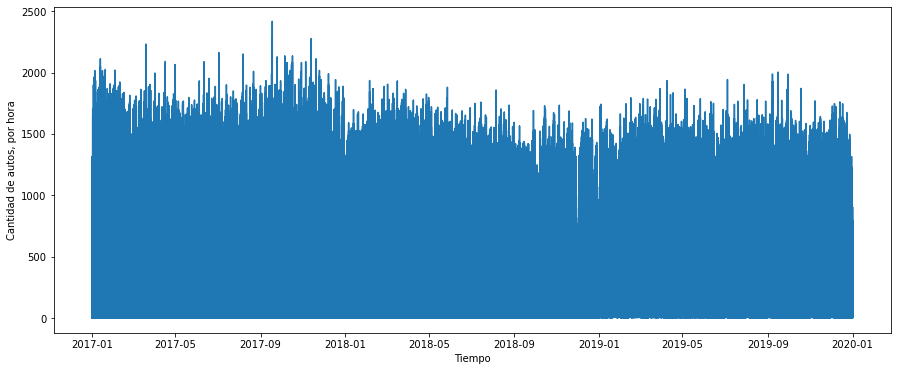

In [918]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [919]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


Se realizo el resampleo para obtener un dataset mas simple para la aplicacio y analisis de la serie de tiempo propiamente dicha. Se realizo un resampleo a nivel dia, dado que creeo que es un periodo interensante de analizar para entender el trafico a nivel diario.

Analizare si existe algun Outlier para poder trabajar sobre el dataset y asi optimizarlo.

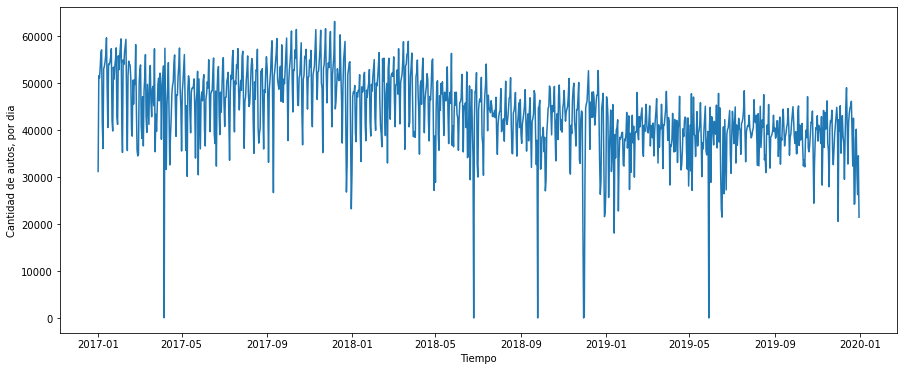

In [920]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Notamos en el grafico que podemos identificar algunos outliers por lo que a diferencia en los Proyectos anteriores, donde eliminabamos aquellos outliers que no eran gran parte del universo del data set, en este caso no podremos eliminarlos. No podremos eliminarlos dado que en una serie de tiempo ese dato posee dicha historia, y es explicado por su dato del dìa anterior y tambien explica el dato del dia posterior. Es por este motivo que decidire reemplazar dichos outliers por un dato feacente que sera calculado a traves del metodo de interpolacion.

Identificare los Outliers utilizando la regla de 3 Sigma y definire un Umbral minimo y uno maximo.

In [921]:
mean=diario.cantidad_pasos.mean()
std=diario.cantidad_pasos.std()

umbral_max=mean + 3*std
umbral_min=mean-3*std

print("Umbral maximo:",round(umbral_max))
print("Umbral minimo:",round(umbral_min))

Umbral maximo: 68291
Umbral minimo: 19135


In [922]:
for i in range(len(diario)):
    if(diario['cantidad_pasos'][i]< umbral_min)|(diario['cantidad_pasos'][i]>umbral_max):
        diario['cantidad_pasos'][i]=0
    i+=1
diario.shape

(1095, 1)

In [923]:
diario2 = diario.replace(0,np.nan, regex=True)
diario2.shape

(1095, 1)

Como no eliminare los outliers, lo que hago es reemplazarlos por valores Nulos para luego realizar el metodo de interpolacion.

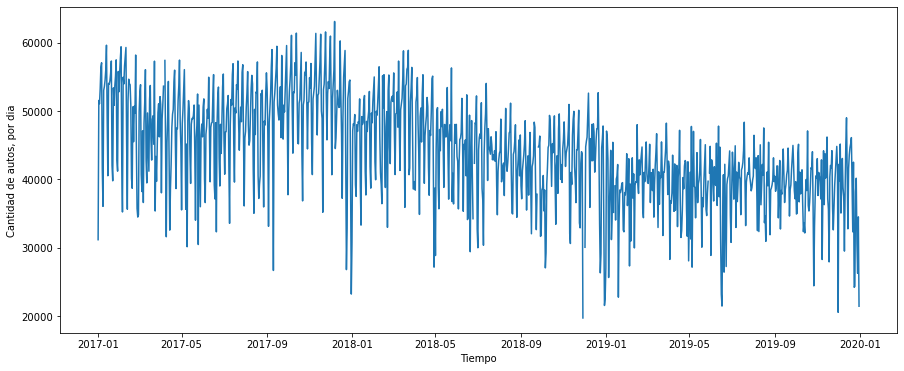

In [924]:
plt.figure(figsize = (15,6))
plt.plot(diario2.index, diario2.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Uno de los métodos de interpolación más sencillos es el lineal. En general, en la interpolación lineal se utilizan dos puntos, para obtener un tercer punto interpolado (x,y) entre ambos puntos. Dicha funcion realiza esa interpolacion entre dos puntos, el anterior y el posterios y traza la linea.

In [925]:
print(diario2.isna().sum())
diario2 = diario2.interpolate()
print(diario2.isna().sum())

cantidad_pasos    7
dtype: int64
cantidad_pasos    0
dtype: int64


Podemos ver como antes de la interpolacion, habia 7 valores Nulos, y luego de la interpolacion, no hay.

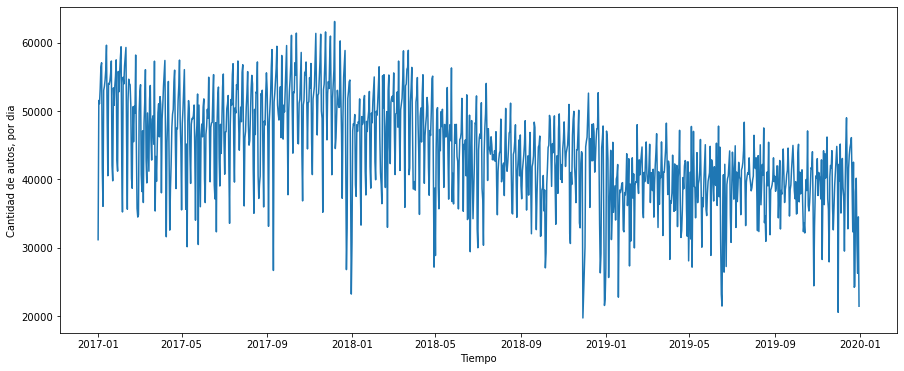

In [926]:
plt.figure(figsize = (15,6))
plt.plot(diario2.index, diario2.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Ya tenemos nuestro Dataset con los valores interpolados, listo para continuar trabajando.

Realizare un resampleo a nivel semana para analizar y poder visualizar mejor su tendencia.

In [927]:
semanal = dataset.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.head()

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581


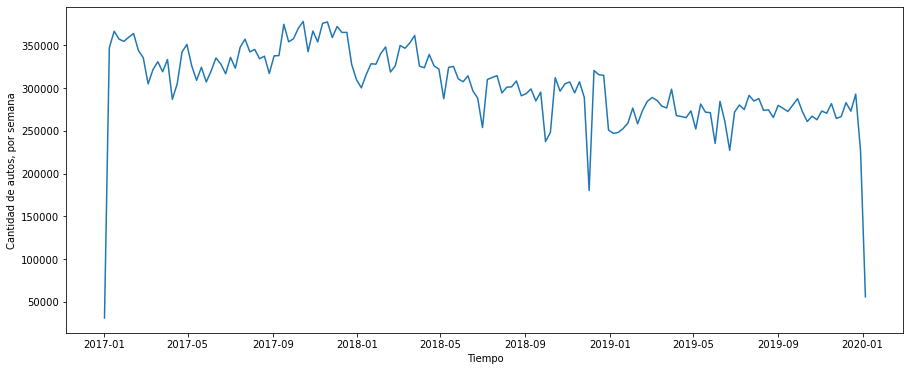

In [928]:
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.show()

Si bien podemos notar una disminucion, continuaremos con un resampleo mensual para tener una mejor visualizacion aun.

In [929]:
mensual = dataset.resample('M', on = 'fecha').sum()
print(mensual.shape)
mensual.head()

(36, 1)


,cantidad_pasos
fecha,
2017-01-31,1565260
2017-02-28,1363113
2017-03-31,1451214
2017-04-30,1373985
2017-05-31,1407136


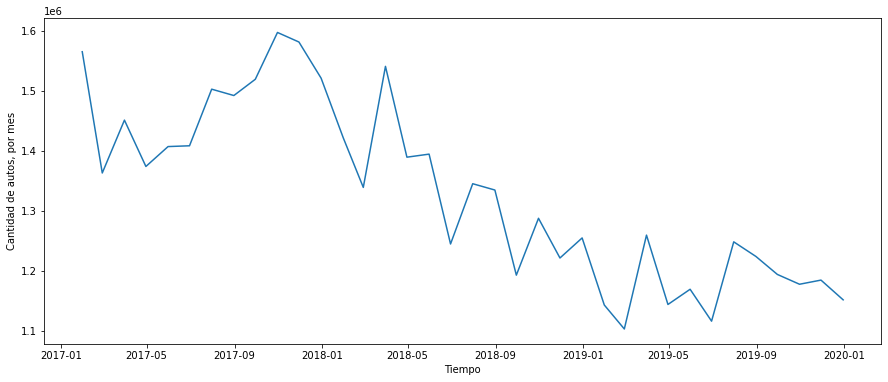

In [930]:
plt.figure(figsize = (15,6))
plt.plot(mensual.index, mensual.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por mes')
plt.show()

Podemos notar como la cantidad de pasos disminuye con el correr del tiempo. Esto no solo debe darse a que en la Sociedad se creo el concepto de utilizar menos el auto, de realizar pools para ir al trabajo por la contaminacion global. Sino que tambien se debe dar a que creo mucho la forma de pago con tarjeta dado que en el ultimo tiempo se promociono el TELEPASE. El Telepase, es un dispositivo que genera que no pagues en efectivo y luego te llega la cuenta a la tarjeta.

Por ambos motivos, es que se puede haber dado esta disminucion en la cantidad de autos circulando.

Vamos a realizar el analisis y calculo de la **Media movil**

In [931]:
ventana = int(365*3/7)
diario2_tendencia = diario2.cantidad_pasos.rolling(window=ventana, center = True).mean()
diario2_tendencia

fecha
2017-01-01   NaN
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

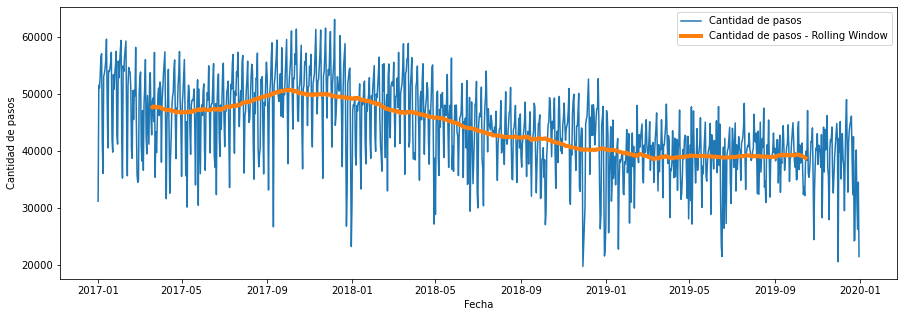

In [932]:
plt.figure(figsize = (15,5))
plt.plot(diario2.index, diario2.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(diario2_tendencia, lw = 4, label = 'Cantidad de pasos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

Podemos notar como la media movil fue disminuyendo, llegando a una estabilizacion en el 2019.

Analizaremos la **Tendencia Lineal**

In [933]:
diario2['fecha_numeros']=diario2.index.map(datetime.datetime.toordinal)
diario2.head()

,cantidad_pasos,fecha_numeros
fecha,,
2017-01-01,31183.00000,736330
2017-01-02,51568.00000,736331
2017-01-03,51093.00000,736332
2017-01-04,53332.00000,736333
2017-01-05,56486.00000,736334


In [934]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(diario2.fecha_numeros.values.reshape(-1, 1), diario2.cantidad_pasos)

LinearRegression()

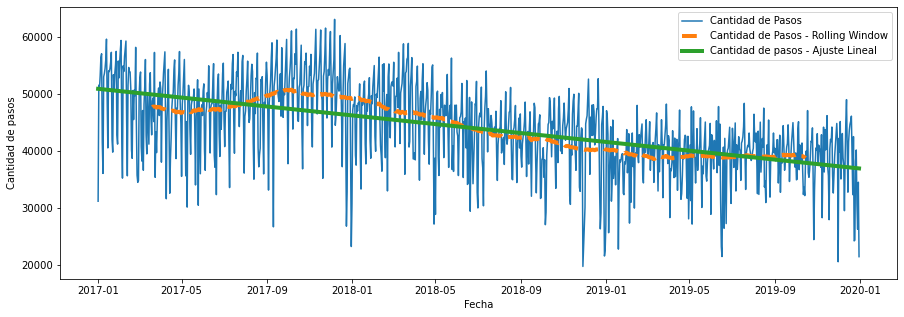

In [935]:
plt.figure(figsize = (15,5))
plt.plot(diario2.index, diario2.cantidad_pasos, label = 'Cantidad de Pasos')
plt.plot(diario2_tendencia, ls = '--', lw = 4, label = 'Cantidad de Pasos - Rolling Window')
plt.plot(diario2.index, lr.predict(diario2.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Cantidad de pasos - Ajuste Lineal')
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

Podemos visualizar la tendencia lineal de la Serie de Tiempo. Es negativa, esto puede darse no porque los autos disminuyan, sino porque en Argentina,CABA el metodo de pago online es obligatorio, entonces se esta migrando a otro metodo de pago.

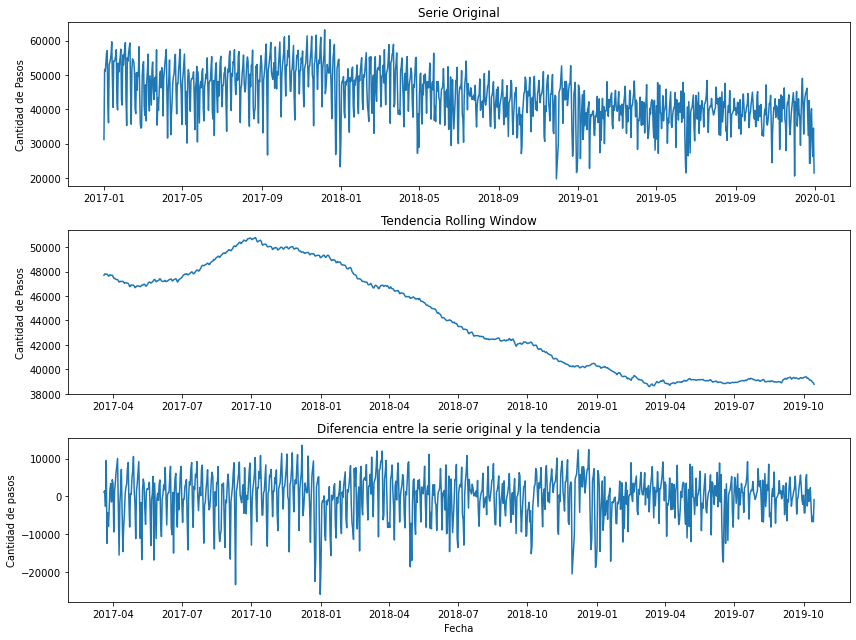

In [936]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(diario2.index, diario2.cantidad_pasos)
plt.ylabel('Cantidad de Pasos')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(diario2_tendencia)
plt.ylabel('Cantidad de Pasos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(diario2.index, diario2.cantidad_pasos - diario2_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')

plt.tight_layout()
plt.show()

Podemos notar claramente que la tendencia es Negativa, mientras que la diferencia de la serie original y la tendencia mantiene cierta estabilidad.

Vamos a analizar la **Autocorrelacion**

In [937]:
from statsmodels.tsa.stattools import acf

nlags =  365
autocorr = acf(diario2.cantidad_pasos, nlags = nlags)

C:\Users\Pc\Data Science\envs\datascience\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [938]:
autocorr.shape

(366,)

Text(0.5, 0, 'lag')

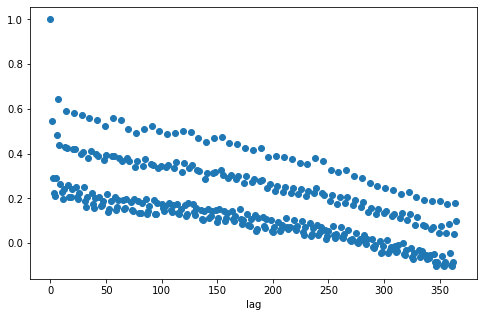

In [939]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

<Figure size 1080x360 with 0 Axes>

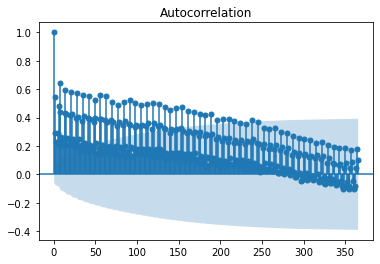

In [940]:
plt.figure(figsize = (15,5))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diario2.cantidad_pasos, lags = 365)
plt.show()

Podemos notar que a partir de los 200 dìas la autocorrelacion empieza a disminuir. Por lo que para el look_back seria recomendable utilizar un periodo de 200 dìas.

Realizaremos la Prediccion a Futuro

In [941]:
senial = diario2.cantidad_pasos
senial.head()

fecha
2017-01-01   31183.00000
2017-01-02   51568.00000
2017-01-03   51093.00000
2017-01-04   53332.00000
2017-01-05   56486.00000
Freq: D, Name: cantidad_pasos, dtype: float64

In [942]:
look_back = 200 # usamos la cantidad de dias que esta fuera de lo sombreado en el grafico de Autocorrelacion.

In [943]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(894, 200) (894,)


In [944]:
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [945]:
print(X)

[[31183. 51568. 51093. ... 50486. 49725. 53875.]
 [51568. 51093. 53332. ... 49725. 53875. 53213.]
 [51093. 53332. 56486. ... 53875. 53213. 57344.]
 ...
 [40257. 47811. 37476. ... 24349. 38168. 40182.]
 [47811. 37476. 44731. ... 38168. 40182. 30681.]
 [37476. 44731. 31277. ... 40182. 30681. 26259.]]


In [946]:
print(y)

[53213.  57344.  48225.  44288.  48188.  50589.  48454.  55684.  56792.
 46408.  36125.  46097.  47043.  50552.  52686.  55788.  47975.  45023.
 45662.  49491.  53266.  55239.  53992.  41545.  35050.  50265.  46575.
 52802.  52620.  57203.  40555.  37223.  39266.  40489.  52553.  52294.
 53062.  43345.  35978.  48545.  47960.  52580.  55605.  53217.  46608.
 33144.  48389.  50570.  52523.  56435.  59010.  44322.  26684.  51330.
 52612.  54362.  56249.  59496.  50885.  49586.  48697.  51556.  53568.
 46125.  58152.  49990.  45911.  50888.  49890.  53277.  57156.  59604.
 49091.  37765.  49915.  52889.  54565.  56841.  61099.  50757.  43852.
 52788.  52705.  57090.  55265.  61421.  53235.  45328.  45216.  51178.
 51731.  55168.  58594.  43819.  36865.  50902.  51590.  55694.  55296.
 57199.  51497.  44472.  51266.  51354.  54906.  53374.  56977.  45356.
 40714.  51784.  52720.  53623.  57499.  61382.  52125.  46511.  52328.
 52579.  54882.  57253.  61259.  50018.  48944.  35200.  53156. 

In [947]:
N_train = 1000 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 90 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(800, 200) (800,)
(90, 200) (90,)


Vere como se ajusta un modelo de arboles a la serie de datos.

In [948]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
tree = DecisionTreeRegressor(max_depth=12).fit(X_train,y_train)

In [949]:
y_pred_tree = tree.predict(X)
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

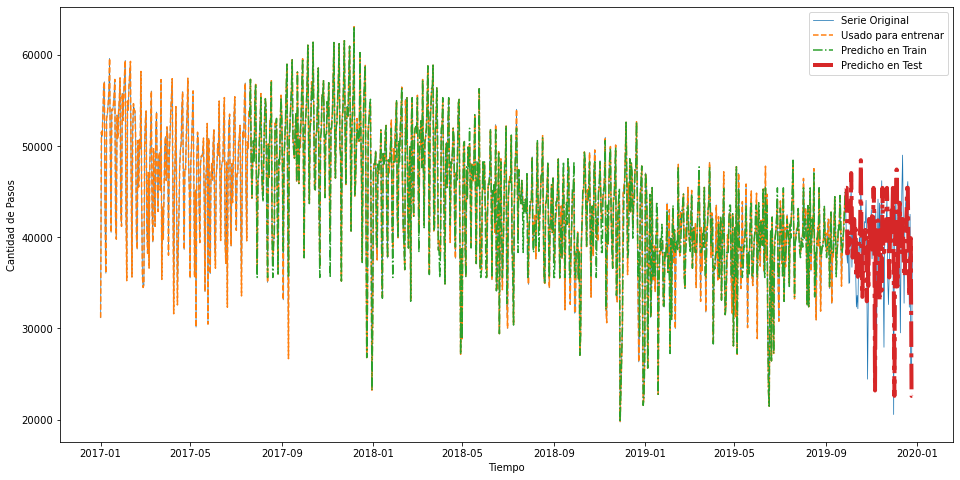

In [950]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred_tree,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_tree,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

Vamos a calcular el error cuadratico medio y una metrica que dadas las circustancias del problema me parece util analizar que es el **Poder de generalizacion**. Esta metrica va a estar dada por la raiz de la diferencia de ambos errores cuadraticos medios tanto el de entrenamiento como el de testeo y va a representar la generalidad con la que los datos se ajustan al modelo.

In [951]:
from sklearn.metrics import mean_squared_error,r2_score
MSE_tree_train = mean_squared_error(y_train, y_train_pred_tree)
print('Error en Train:',np.sqrt(MSE_tree_train))

MSE_tree_test = mean_squared_error(y_test, y_test_pred_tree)
print('Error en Test:',np.sqrt(MSE_tree_test))

Error en Train: 1566.8805634910357
Error en Test: 5995.739654735676


Podemos visualizar la gran diferencia entre ambos errores lo que podria ser que el modelo este sobreajustado.

In [952]:
Poder_Generalizacion2=np.abs(np.sqrt(MSE_tree_train)- np.sqrt(MSE_tree_test))
print(round(Poder_Generalizacion2))

4429


Para mejorar el modelo de arboles, realizare un modelo de Random Forest para justamente eliminar el sobreajuste y mejorar el modelo.

In [953]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=150, random_state=42, n_jobs = 4).fit(X_train,y_train)

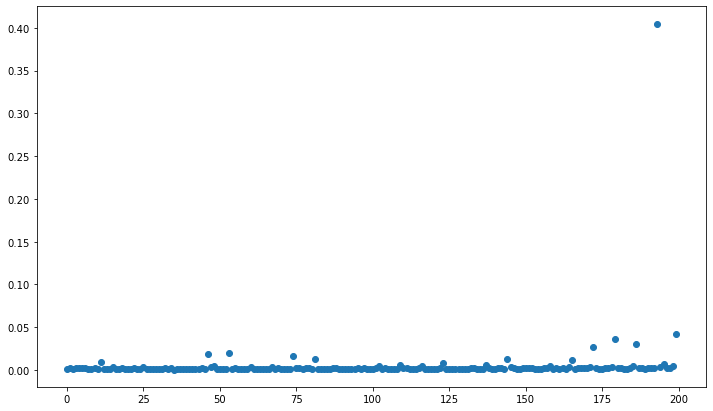

In [954]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
plt.show()

In [955]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

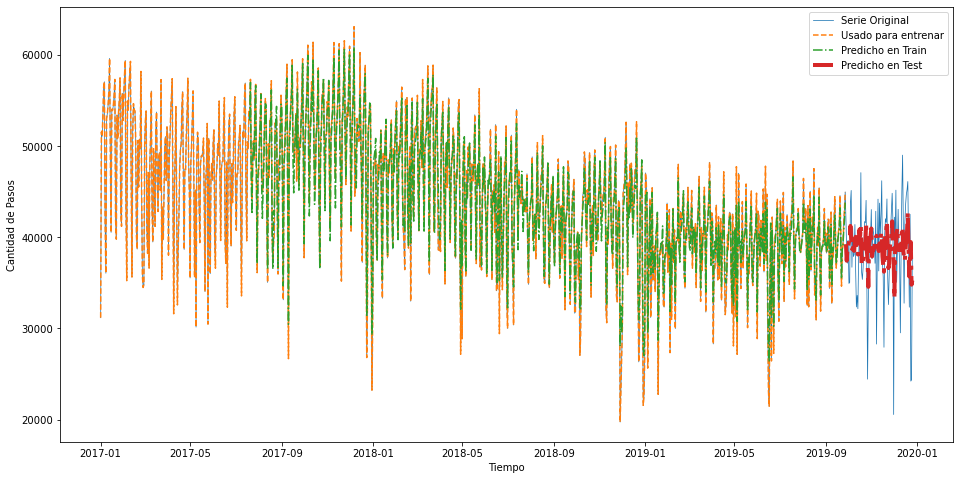

In [956]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

In [957]:
MSE_train = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE_train))

MSE_test = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE_test))

Error en Train: 1763.5708615536382
Error en Test: 4710.08267649906


In [958]:
dicc={"Error Cuadratico Medio":[np.sqrt(MSE_tree_train),np.sqrt(MSE_train),np.sqrt(MSE_tree_test),np.sqrt(MSE_test)],"Split":["Train","Train","Test","Test"],"Modelo":["Arboles","Random Forest","Arboles","Random Forest"]}

In [959]:
resultados=pd.DataFrame(dicc)
resultados

,Error Cuadratico Medio,Split,Modelo
0,1566.88056,Train,Arboles
1,1763.57086,Train,Random Forest
2,5995.73965,Test,Arboles
3,4710.08268,Test,Random Forest


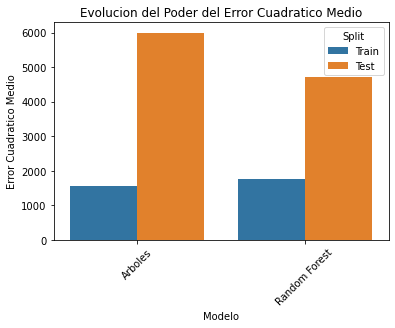

In [960]:
sns.barplot(data=resultados,x="Modelo", y="Error Cuadratico Medio",hue="Split")
plt.xticks(rotation = 45)
plt.title("Evolucion del Poder del Error Cuadratico Medio")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar a diferencia que el modelo de arboles que la diferencia de los errores cuadraticos medios disminuye y tambien sus valores absolutos, lo que el modelo de Random Forest mejoro las metricas analizadas.

In [961]:
Poder_Generalizacion1=np.abs(np.sqrt(MSE_train)- np.sqrt(MSE_test))
print(round(Poder_Generalizacion1))

2947


In [962]:
dicc2={"Poder de Generalizacion":[Poder_Generalizacion2,Poder_Generalizacion1],"Modelo":["Arboles","Random Forest"]}

In [963]:
resultados2=pd.DataFrame(dicc2)
resultados2

,Poder de Generalizacion,Modelo
0,4428.85909,Arboles
1,2946.51181,Random Forest


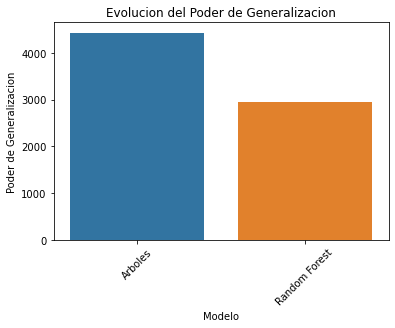

In [964]:
sns.barplot(data=resultados2,x="Modelo", y="Poder de Generalizacion")
plt.xticks(rotation = 45)
plt.title("Evolucion del Poder de Generalizacion")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Ademas de la disminucion del error cuadratico medio, podemos notar que disminuyo la metrica del poder de Generalizacion, lo cual es bueno.

**Optimizacion de Hiperparametros**

Vamos a variar los Hiperparametros para lograr encontrar un modelo aun mejor.

In [1052]:
rf_2 = RandomForestRegressor(n_estimators=200,criterion='mse', min_samples_leaf=4, min_samples_split= 4,random_state=42)

In [1053]:
rf_2.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=4, n_estimators=200,
                      random_state=42)

In [1054]:
y_train_pred_opt = rf_2.predict(X_train)
y_test_pred_opt = rf_2.predict(X_test)

In [1055]:
MSE_opt_train = mean_squared_error(y_train, y_train_pred_opt)
print('Error en Train:',np.sqrt(MSE_opt_train))

MSE_opt_test = mean_squared_error(y_test, y_test_pred_opt)
print('Error en Test:',np.sqrt(MSE_opt_test))

Error en Train: 2359.97086852538
Error en Test: 4773.698522894643


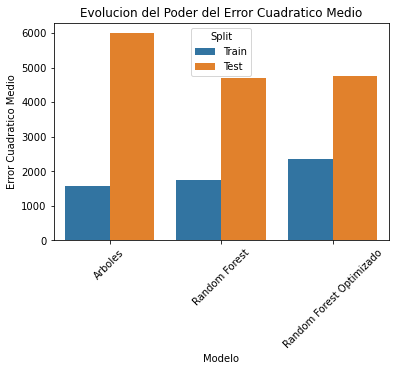

In [1056]:
dicc3={"Error Cuadratico Medio":[np.sqrt(MSE_tree_train),np.sqrt(MSE_train),np.sqrt(MSE_tree_test),np.sqrt(MSE_test),np.sqrt(MSE_opt_train),np.sqrt(MSE_opt_test)],"Split":["Train","Train","Test","Test","Train","Test"],"Modelo":["Arboles","Random Forest","Arboles","Random Forest","Random Forest Optimizado","Random Forest Optimizado"]}
resultados3=pd.DataFrame(dicc3)
resultados3
sns.barplot(data=resultados3,x="Modelo", y="Error Cuadratico Medio",hue="Split")
plt.xticks(rotation = 45)
plt.title("Evolucion del Poder del Error Cuadratico Medio")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar que si bien el error de testeo no disminuyo, podemos visualizar que el error de entrenamiento aumento lo que podemos concluir que el sobreajuste esta disminuyendo.

In [1057]:
Poder_Generalizacion=np.abs(np.sqrt(MSE_opt_train)- np.sqrt(MSE_opt_test))
print(round(Poder_Generalizacion))

2414


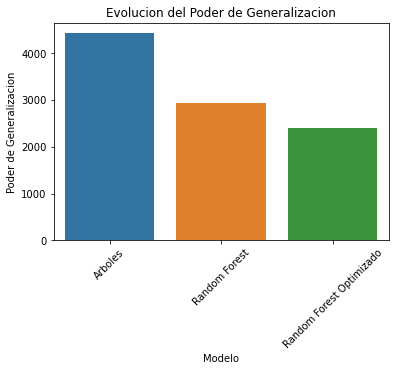

In [1058]:
dicc4={"Poder de Generalizacion":[Poder_Generalizacion2,Poder_Generalizacion1,Poder_Generalizacion],"Modelo":["Arboles","Random Forest","Random Forest Optimizado"]}
resultados3=pd.DataFrame(dicc4)
resultados3
sns.barplot(data=resultados3,x="Modelo", y="Poder de Generalizacion")
plt.xticks(rotation = 45)
plt.title("Evolucion del Poder de Generalizacion")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Si bien notamos que habia disminuido el sobre ajuste, podemos notar como disminuyo el Poder de Generalizacion, lo cual significa que el modelo esta mejorando.

In [1046]:
z2=[]
z3=[]
for i in range(200,250):
    rf_3 = RandomForestRegressor(n_estimators=i,criterion='mse', min_samples_leaf=4, min_samples_split= 4,random_state=42)
    rf_3.fit(X_train,y_train)
    y_train_pred_opt = rf_3.predict(X_train)
    y_test_pred_opt = rf_3.predict(X_test)
    z2.append(np.sqrt(mean_squared_error(y_train, y_train_pred_opt)))
    z3.append(np.sqrt(mean_squared_error(y_test, y_test_pred_opt)))

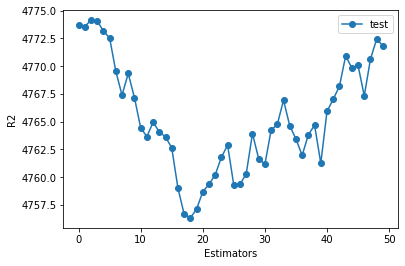

In [1047]:
plt.plot(z3,'o-',label='test')
plt.legend()
plt.xlabel('Estimators')
plt.ylabel('R2')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar como en los 245 de la cantidad de estimadores del Random Forest se ve que es el menor valor del Error en el modelo de testeo.

In [1050]:
rf_4 = RandomForestRegressor(n_estimators=218,criterion='mse', min_samples_leaf=4, min_samples_split= 4,random_state=42)
rf_4.fit(X_train,y_train)
y_train_pred_opt = rf_4.predict(X_train)
y_test_pred_opt = rf_4.predict(X_test)

In [1051]:
MSE_opt_train2 = mean_squared_error(y_train, y_train_pred_opt)
print('Error en Train:',np.sqrt(MSE_opt_train2))

MSE_opt_test2 = mean_squared_error(y_test, y_test_pred_opt)
print('Error en Test:',np.sqrt(MSE_opt_test2))

Error en Train: 2357.23643902724
Error en Test: 4756.3271078819835


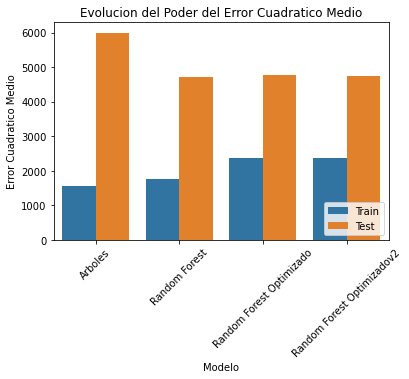

In [1059]:
dicc32={"Error Cuadratico Medio":[np.sqrt(MSE_tree_train),np.sqrt(MSE_train),np.sqrt(MSE_tree_test),np.sqrt(MSE_test),np.sqrt(MSE_opt_train),np.sqrt(MSE_opt_test),np.sqrt(MSE_opt_train2),np.sqrt(MSE_opt_test2)],"Split":["Train","Train","Test","Test","Train","Test","Train","Test"],"Modelo":["Arboles","Random Forest","Arboles","Random Forest","Random Forest Optimizado","Random Forest Optimizado","Random Forest Optimizadov2","Random Forest Optimizadov2"]}
resultados32=pd.DataFrame(dicc32)
resultados32
sns.barplot(data=resultados32,x="Modelo", y="Error Cuadratico Medio",hue="Split")
plt.xticks(rotation = 45)
plt.legend(loc=4)
plt.title("Evolucion del Poder del Error Cuadratico Medio")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [1060]:
Poder_Generalizacion32=np.abs(np.sqrt(MSE_opt_train2)- np.sqrt(MSE_opt_test2))
print(round(Poder_Generalizacion32))

2399


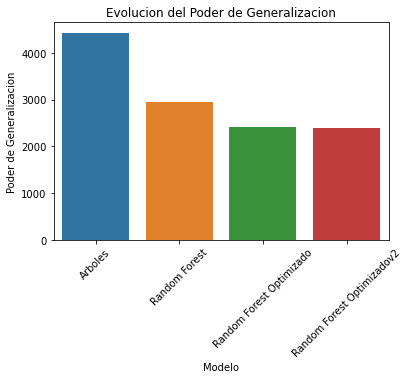

In [1061]:
dicc42={"Poder de Generalizacion":[Poder_Generalizacion2,Poder_Generalizacion1,Poder_Generalizacion,Poder_Generalizacion32],"Modelo":["Arboles","Random Forest","Random Forest Optimizado","Random Forest Optimizadov2"]}
resultados42=pd.DataFrame(dicc42)
resultados42
sns.barplot(data=resultados42,x="Modelo", y="Poder de Generalizacion")
plt.xticks(rotation = 45)
plt.title("Evolucion del Poder de Generalizacion")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos ver como si bien no es notoria la disminucion del Poder de Generalizacion, ha disminuido con la variacion de la profundidad del Random Forest.

**Modelo Benchmark** para comparar nuestro modelo.

Comparamos el error con el que habríamos obtenido si predecíamos copiando el valor de la fecha de hace 7 dias, es decir una semana antes.

In [1062]:
y_test_pred_benchmark = y[-7 + N_train:N_train+N_test - 7]

ValueError: x and y must have same first dimension, but have shapes (165,) and (60,)

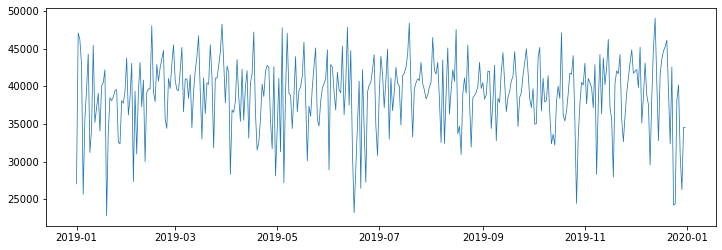

In [1063]:
plt.figure(figsize=(12,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial.index[N_train+look_back], senial.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.legend()
plt.show()

In [ ]:
y_test_pred_benchmark = y[-7 + N_train:N_train+N_test - 7]
MSE = mean_squared_error(y_test, y[-7 + N_train:N_train+N_test - 7])
print(np.sqrt(MSE))

Al comparar nuestro modelo con el de Benchmark podemos notar que el haber aplicado nuestro modelos con sus hiperparametros sirvio para mejorarlo dado que el **error cuadratico medio es menor.**

Vamos a optar por el modelo de **Multi Step Prediction** que realiza la prediccion de una secuencia de valores de una seria de tiempo. Es el enfoque de prediccion en multiples etapas, que aplica un modelo predictivo paso a paso y usar el valor predicho del paso de tiempo actual para determinar su valor en el siguiente paso de tiempo.

Multi-Step Prediction

In [1064]:
y_ms_train_pred = []
x = X_train[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_train.size):
    y_os_train_pred = rf.predict(x.reshape(1,-1))
    y_ms_train_pred.append(y_os_train_pred)
    x = np.append(x[1:], y_os_train_pred)
y_ms_train_pred = np.array(y_ms_train_pred)

In [1065]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

In [1066]:
MSE_mult_train = mean_squared_error(y_train, y_ms_train_pred)
print('Error en Train:',np.sqrt(MSE_mult_train))

MSE_mult_test = mean_squared_error(y_test,  y_ms_test_pred)
print('Error en Test:',np.sqrt(MSE_mult_test))

Error en Train: 5873.834217606391
Error en Test: 5012.891173415698


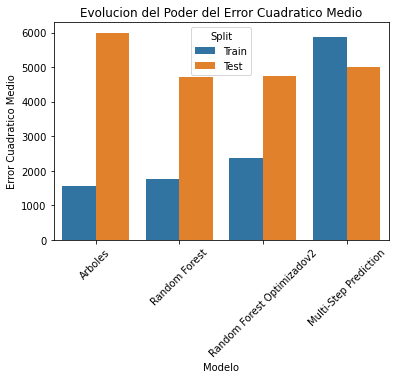

In [1067]:
dicc5={"Error Cuadratico Medio":[np.sqrt(MSE_tree_train),np.sqrt(MSE_train),np.sqrt(MSE_tree_test),np.sqrt(MSE_test),np.sqrt(MSE_opt_train2),np.sqrt(MSE_opt_test2),np.sqrt(MSE_mult_train),np.sqrt(MSE_mult_test)],"Split":["Train","Train","Test","Test","Train","Test","Train","Test"],"Modelo":["Arboles","Random Forest","Arboles","Random Forest","Random Forest Optimizadov2","Random Forest Optimizadov2","Multi-Step Prediction","Multi-Step Prediction"]}
resultados4=pd.DataFrame(dicc5)
resultados4
sns.barplot(data=resultados4,x="Modelo", y="Error Cuadratico Medio",hue="Split")
plt.xticks(rotation = 45)
plt.title("Evolucion del Poder del Error Cuadratico Medio")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Si bien podemos notar como aumentaron ambos errores cuadraticos medios, podemos deducir que ya no hay sobre ajuste en el modelo, lo cual es bueno teniendo en cuenta a futuros datos que puede predecir el modelo para evitar el sobre ajusto.

In [1068]:
Poder_Generalizacion5=np.abs(np.sqrt(MSE_mult_train)- np.sqrt(MSE_mult_test))
print(round(Poder_Generalizacion5))

861


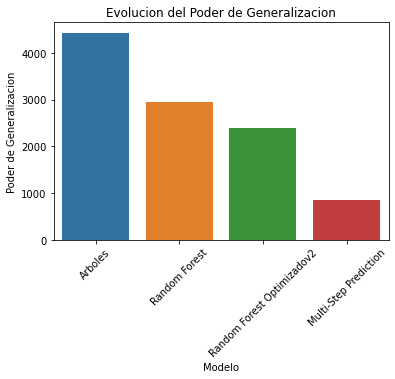

In [1069]:
dicc6={"Poder de Generalizacion":[Poder_Generalizacion2,Poder_Generalizacion1,Poder_Generalizacion32,Poder_Generalizacion5],"Modelo":["Arboles","Random Forest","Random Forest Optimizadov2","Multi-Step Prediction"]}
resultados5=pd.DataFrame(dicc6)
resultados5
sns.barplot(data=resultados5,x="Modelo", y="Poder de Generalizacion")
plt.xticks(rotation = 45)
plt.title("Evolucion del Poder de Generalizacion")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Lo que podemos notar, es que la metrica del **Poder de Generalizacion** disminuyo notablemente, lo cual puedo concluir que el modelo esta mejorando.

Voy a analizar la misma Serie de tiempo, pero con los datos del 2019. Utilizare los datos del 2019 dado que cuando grafico la media movil puedo notar cierta estabilizacion de la metrica por lo que creeria en una primera instancia que no se vera afectado mi modelo con una variacion muy grande en la explicacion de los datos. Por dicho motivo, realizare todos los pasos realizados pero con los datos del 2019 para poder predecir el ultimo trimestre con informacion estable.

In [1070]:
data2019= pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


In [1071]:
data2019.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [1072]:
data2019.count()

periodo           812153
fecha             812153
hora_inicio       812153
hora_fin          812153
dia               812153
estacion          812153
sentido           812153
tipo_vehiculo     812153
forma_pago        812153
cantidad_pasos    812153
dtype: int64

In [1073]:
mask = np.logical_and(data2019.estacion=='Illia', data2019.forma_pago == 'EFECTIVO')
dataset_2019 = data2019[mask]

In [1074]:
dataset_2019.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset_2019.head()

C:\Users\Pc\Data Science\envs\datascience\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [1075]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_2019['fecha2'] = pd.to_datetime(dataset_2019.fecha,infer_datetime_format=True) + pd.to_timedelta(dataset_2019.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_2019.drop(columns=['fecha','hora_fin'], inplace = True)

dataset_2019.head()

<ipython-input-1075-4500eeca0515>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2019['fecha2'] = pd.to_datetime(dataset_2019.fecha,infer_datetime_format=True) + pd.to_timedelta(dataset_2019.hora_fin, unit = 'h')
C:\Users\Pc\Data Science\envs\datascience\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [1076]:
#Corregimos el nombre de fecha2 a fecha
dataset_2019.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset_2019.head()

C:\Users\Pc\Data Science\envs\datascience\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [1077]:
#Reordenamos el dataset por fecha
dataset_2019.sort_values('fecha', inplace = True)
dataset_2019.reset_index(drop=True, inplace = True)
dataset_2019

<ipython-input-1077-d7e230395375>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2019.sort_values('fecha', inplace = True)


,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Martes,Centro,Liviano,644,2019-01-01 00:00:00
1,Martes,Provincia,Liviano,630,2019-01-01 00:00:00
2,Martes,Provincia,Pesado,9,2019-01-01 00:00:00
3,Martes,Centro,Pesado,3,2019-01-01 00:00:00
4,Martes,Centro,Liviano,537,2019-01-01 02:00:00
...,...,...,...,...,...
34638,Martes,Centro,Pesado,2,2019-12-31 22:00:00
34639,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
34640,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
34641,Martes,Centro,Liviano,214,2019-12-31 23:00:00


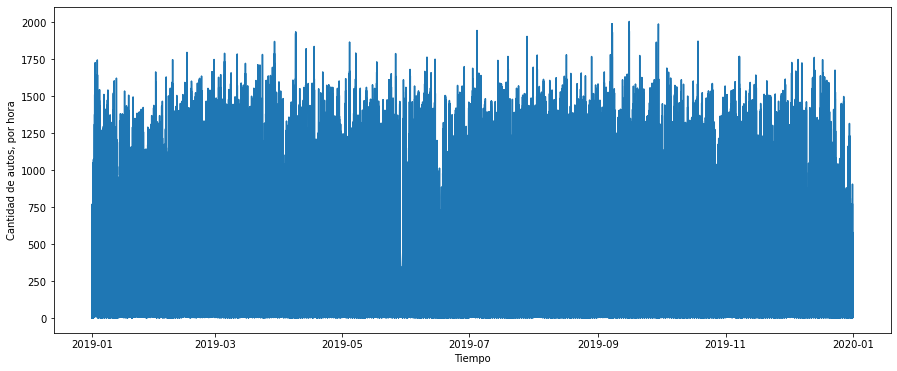

In [1078]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset_2019.fecha, dataset_2019.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [1079]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_2019 = dataset_2019.resample('D', on = 'fecha').sum()
print(diario_2019.shape)
diario_2019.head()

(365, 1)


,cantidad_pasos
fecha,
2019-01-01,27038
2019-01-02,47080
2019-01-03,46194
2019-01-04,42887
2019-01-05,25650


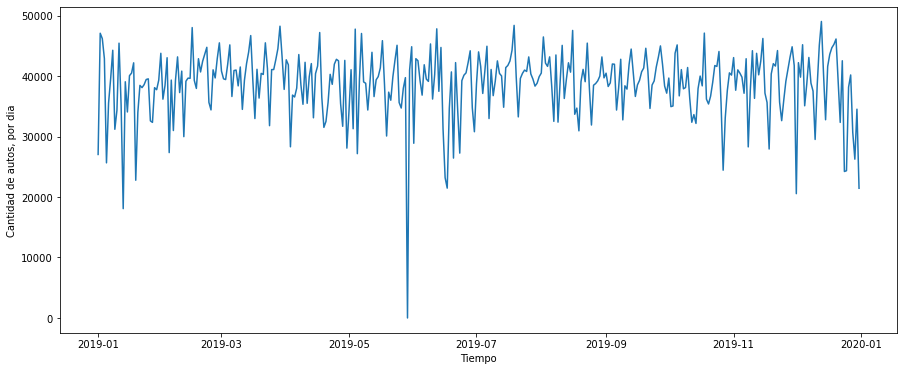

In [1080]:
plt.figure(figsize = (15,6))
plt.plot(diario_2019.index, diario_2019.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [1081]:
mean=diario_2019.cantidad_pasos.mean()
std=diario_2019.cantidad_pasos.std()

umbral_max=mean + 3*std
umbral_min=mean-3*std

print("Umbral maximo:",round(umbral_max))
print("Umbral minimo:",round(umbral_min))

Umbral maximo: 55273
Umbral minimo: 22070


In [1082]:
for i in range(len(diario_2019)):
    if(diario_2019['cantidad_pasos'][i]< umbral_min)|(diario_2019['cantidad_pasos'][i]>umbral_max):
        diario_2019['cantidad_pasos'][i]=0
    i+=1
diario_2019.shape

(365, 1)

In [1083]:
diario2 = diario_2019.replace(0,np.nan, regex=True)
diario2.shape

(365, 1)

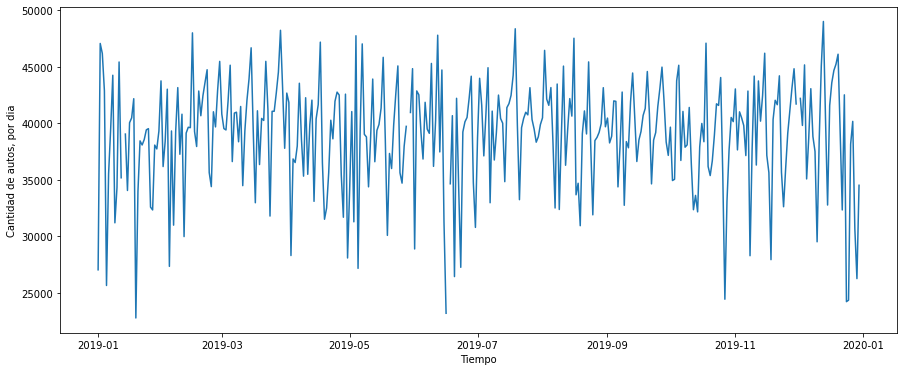

In [1084]:
plt.figure(figsize = (15,6))
plt.plot(diario2.index, diario2.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [1085]:
print(diario2.isna().sum())
diario2 = diario2.interpolate()
print(diario2.isna().sum())

cantidad_pasos    5
dtype: int64
cantidad_pasos    0
dtype: int64


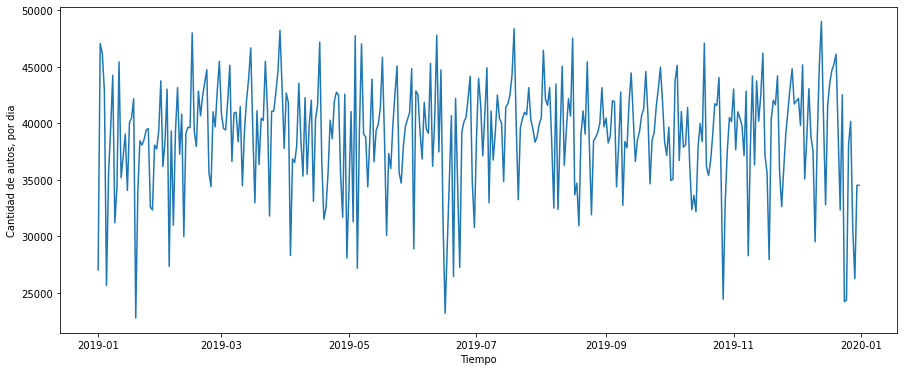

In [1086]:
plt.figure(figsize = (15,6))
plt.plot(diario2.index, diario2.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [1087]:
semanal = dataset_2019.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.head()

(53, 1)


,cantidad_pasos
fecha,
2019-01-06,224395
2019-01-13,248077
2019-01-20,252617
2019-01-27,259019
2019-02-03,276568


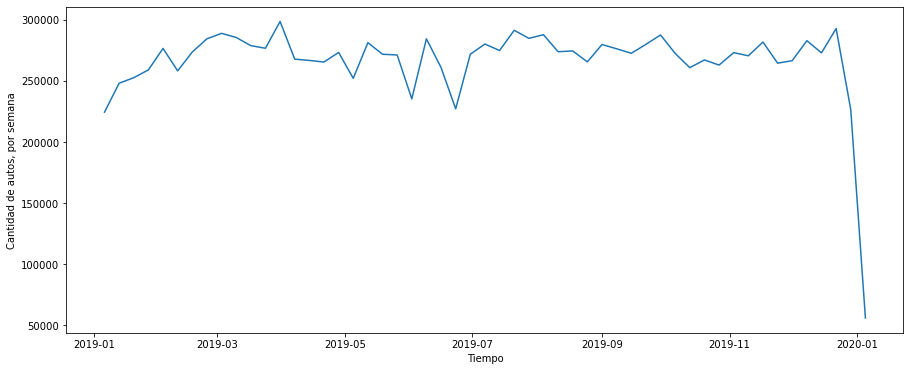

In [1088]:
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.show()

**Media Movil**

In [1089]:
ventana = int(365/7) #Ventana movil semanal.
diario2_tendencia = diario2.cantidad_pasos.rolling(window=ventana, center = True).mean()
diario2_tendencia

fecha
2019-01-01   NaN
2019-01-02   NaN
2019-01-03   NaN
2019-01-04   NaN
2019-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Freq: D, Name: cantidad_pasos, Length: 365, dtype: float64

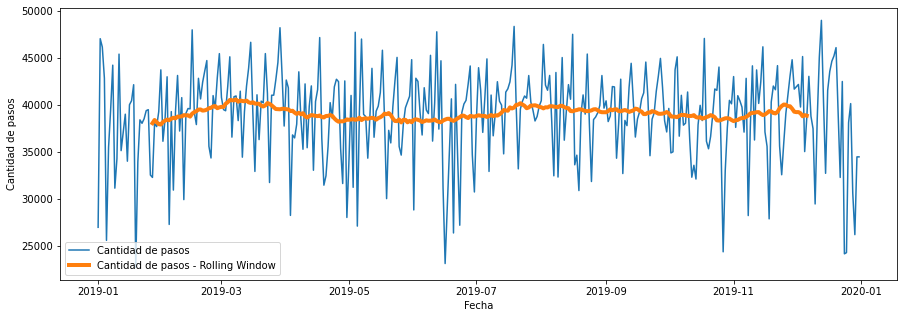

In [1090]:
plt.figure(figsize = (15,5))
plt.plot(diario2.index, diario2.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(diario2_tendencia, lw = 4, label = 'Cantidad de pasos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

**Autocorrelacion**

In [1091]:
from statsmodels.tsa.stattools import acf

nlags =  363
autocorr = acf(diario2.cantidad_pasos, nlags = 363)

C:\Users\Pc\Data Science\envs\datascience\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [1092]:
autocorr.shape

(364,)

Text(0.5, 0, 'lag')

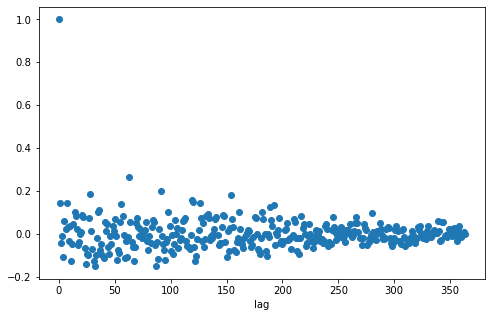

In [1093]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

<Figure size 1080x360 with 0 Axes>

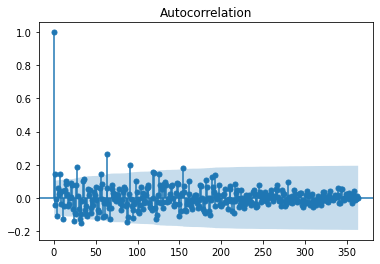

In [1094]:
plt.figure(figsize = (15,5))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diario2.cantidad_pasos, lags = 363)
plt.show()

In [1095]:
senial = diario2.cantidad_pasos
senial.head()

fecha
2019-01-01   27038.00000
2019-01-02   47080.00000
2019-01-03   46194.00000
2019-01-04   42887.00000
2019-01-05   25650.00000
Freq: D, Name: cantidad_pasos, dtype: float64

In [1096]:
look_back =30

In [1097]:
N_2019 = senial.shape[0]
X_2019 = np.zeros((N_2019 - look_back - 1,look_back))
y_2019 = np.zeros(N_2019 - look_back-1 )
print(X_2019.shape, y_2019.shape)

(334, 30) (334,)


In [1098]:
for i in range(X_2019.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X_2019[i,:] = senial.iloc[i:i+look_back]
    y_2019[i] = senial.iloc[i+look_back]

In [1099]:
print(X_2019)

[[27038.  47080.  46194.  ... 38081.  37742.  39326. ]
 [47080.  46194.  42887.  ... 37742.  39326.  43766. ]
 [46194.  42887.  25650.  ... 39326.  43766.  36179. ]
 ...
 [43130.  44841.  41722.  ... 24349.  38168.  40182. ]
 [44841.  41722.  41968.5 ... 38168.  40182.  30681. ]
 [41722.  41968.5 42215.  ... 40182.  30681.  26259. ]]


In [1100]:
print(y_2019)

[43766.  36179.  38443.  43031.  27343.  39333.  30992.  39282.  43170.
 37268.  40816.  29980.  39144.  39659.  39625.  48018.  39283.  37955.
 42869.  40680.  42452.  43635.  44754.  35645.  34404.  41032.  39691.
 42911.  45492.  40830.  39542.  39421.  41991.  45154.  36620.  40915.
 40993.  38375.  41499.  34489.  39325.  42047.  43956.  46695.  39347.
 32975.  41118.  36358.  40441.  40264.  45496.  41240.  31797.  41071.
 41077.  42707.  44538.  48245.  43203.  37797.  42686.  41861.  28303.
 36853.  36537.  37999.  43558.  38586.  35331.  42274.  35495.  39897.
 42062.  33100.  40399.  41665.  47198.  36512.  31515.  32509.  35625.
 40283.  38634.  41963.  42771.  42516.  35423.  31692.  42592.  28086.
 34162.  41049.  31287.  47762.  27166.  39334.  47041.  39034.  38805.
 34384.  38757.  43928.  36607.  39378.  39915.  41358.  45852.  38599.
 30087.  37340.  36005.  39861.  42597.  45091.  35626.  34712.  37985.
 39739.  40353.5 40968.  44849.  28884.  42876.  42536.  39250. 

In [1101]:
N_train = 200 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 60 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total_2019 = N_train + N_test + look_back

X_train_2019 = X_2019[:N_train,:]
y_train_2019 = y_2019[:N_train]
print(X_train_2019.shape, y_train_2019.shape)

X_test_2019 = X_2019[N_train:N_train+N_test,:]
y_test_2019 = y_2019[N_train:N_train+N_test]
print(X_test_2019.shape, y_test_2019.shape)

(170, 30) (170,)
(60, 30) (60,)


In [1102]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

rf_2019 = RandomForestRegressor(n_estimators=175,random_state=42, n_jobs = 4).fit(X_train_2019,y_train_2019)

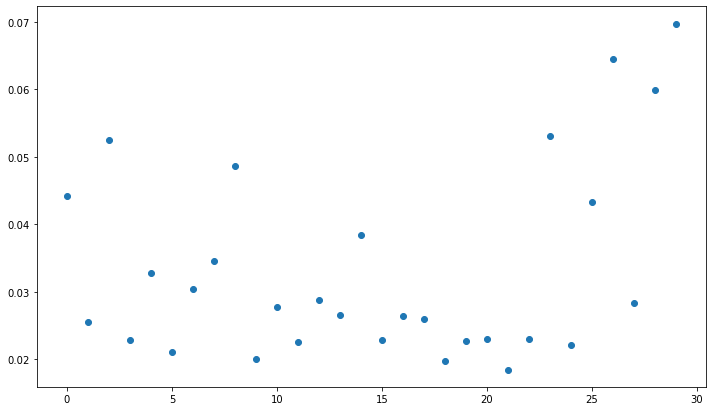

In [1103]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf_2019.feature_importances_.size),rf_2019.feature_importances_)
plt.show()

In [1104]:
y_pred_2019 = rf_2019.predict(X_2019)
y_train_pred_2019 = rf_2019.predict(X_train_2019)
y_test_pred_2019 = rf_2019.predict(X_test_2019)

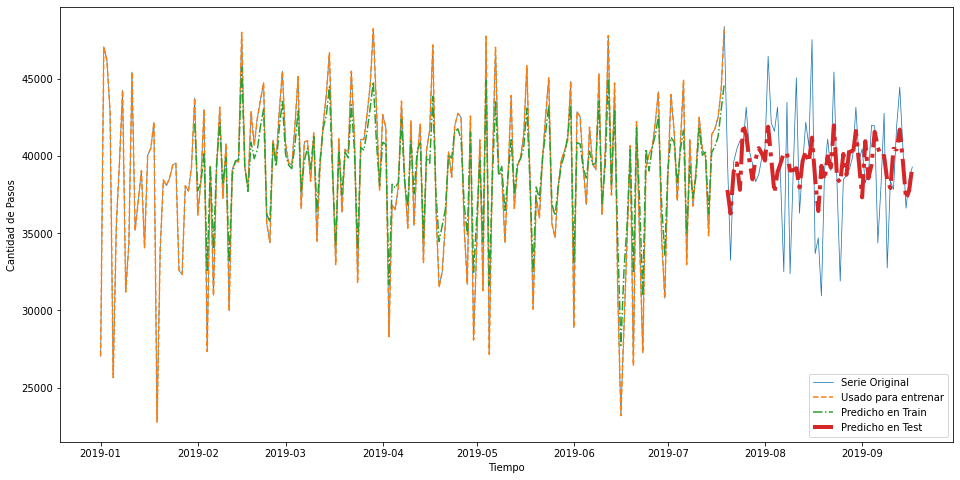

In [1105]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total_2019], senial[:length_total_2019],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred_2019,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total_2019], y_test_pred_2019,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

In [1106]:
MSE_train_2019 = mean_squared_error(y_train_2019, y_train_pred_2019)
print('Error en Train:',np.sqrt(MSE_train_2019))

MSE_test_2019 = mean_squared_error(y_test_2019, y_test_pred_2019)
print('Error en Test:',np.sqrt(MSE_test_2019))

Error en Train: 1823.1293338754306
Error en Test: 3107.692659039154


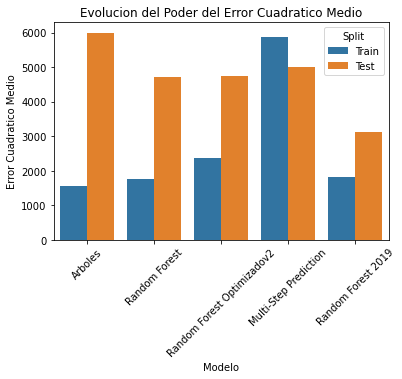

In [1107]:
dicc7={"Error Cuadratico Medio":[np.sqrt(MSE_tree_train),np.sqrt(MSE_train),np.sqrt(MSE_tree_test),np.sqrt(MSE_test),np.sqrt(MSE_opt_train2),np.sqrt(MSE_opt_test2),np.sqrt(MSE_mult_train),np.sqrt(MSE_mult_test),np.sqrt(MSE_train_2019),np.sqrt(MSE_test_2019)],"Split":["Train","Train","Test","Test","Train","Test","Train","Test","Train","Test"],"Modelo":["Arboles","Random Forest","Arboles","Random Forest","Random Forest Optimizadov2","Random Forest Optimizadov2","Multi-Step Prediction","Multi-Step Prediction","Random Forest 2019","Random Forest 2019"]}
resultados6=pd.DataFrame(dicc7)
resultados6
sns.barplot(data=resultados6,x="Modelo", y="Error Cuadratico Medio",hue="Split")
plt.xticks(rotation = 45)
plt.title("Evolucion del Poder del Error Cuadratico Medio")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Cuando analizamos la comparacion, podemos notar como el Modelo con los datos del 2019, se ajusta mucho mejor para predecir que el Modelo con los datos del 2017,2018 y 2019. Podemos ver como disminuyo el error y ademas disminuyo el sobreajuste del modelo.

In [1108]:
Poder_Generalizacion4=np.abs(np.sqrt(MSE_train_2019)- np.sqrt(MSE_test_2019))
print(round(Poder_Generalizacion4))

1285


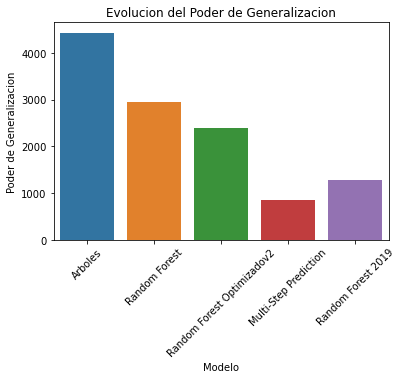

In [1109]:
dicc8={"Poder de Generalizacion":[Poder_Generalizacion2,Poder_Generalizacion1,Poder_Generalizacion32,Poder_Generalizacion5,Poder_Generalizacion4],"Modelo":["Arboles","Random Forest","Random Forest Optimizadov2","Multi-Step Prediction","Random Forest 2019"]}
resultados7=pd.DataFrame(dicc8)
resultados7
sns.barplot(data=resultados7,x="Modelo", y="Poder de Generalizacion")
plt.xticks(rotation = 45)
plt.title("Evolucion del Poder de Generalizacion")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos notar como si bien, el poder de generalizacion es menor que el Modelo con todos los datos y el mismo Modelo Random Forest, pero aun es mayor que el Modelo con todos los datos y el Multi-Step Prediction. Por lo que proseguire por elegir ese modelo para ver como aplica a estos datos.

In [1110]:
y_ms_train_pred_2019 = []
x = X_train_2019[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_train_2019.size):
    y_os_train_pred_2019 = rf_2019.predict(x.reshape(1,-1))
    y_ms_train_pred_2019.append(y_os_train_pred_2019)
    x = np.append(x[1:], y_os_train_pred_2019)
y_ms_train_pred_2019 = np.array(y_ms_train_pred_2019)

In [1111]:
y_ms_test_pred_2019 = []
x = X_test_2019[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test_2019.size):
    y_os_pred_2019 = rf_2019.predict(x.reshape(1,-1))
    y_ms_test_pred_2019.append(y_os_pred_2019)
    x = np.append(x[1:], y_os_pred_2019)
y_ms_test_pred_2019 = np.array(y_ms_test_pred_2019)

In [1112]:
MSE_mult_train_2019 = mean_squared_error(y_train_2019, y_ms_train_pred_2019)
print('Error en Train:',np.sqrt(MSE_mult_train_2019))

MSE_mult_test_2019 = mean_squared_error(y_test_2019,  y_ms_test_pred_2019)
print('Error en Test:',np.sqrt(MSE_mult_test_2019))

Error en Train: 5012.523672687236
Error en Test: 3871.4184370608527


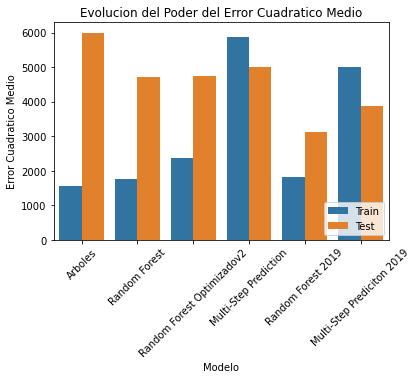

In [1113]:
dicc9={"Error Cuadratico Medio":[np.sqrt(MSE_tree_train),np.sqrt(MSE_train),np.sqrt(MSE_tree_test),np.sqrt(MSE_test),np.sqrt(MSE_opt_train2),np.sqrt(MSE_opt_test2),np.sqrt(MSE_mult_train),np.sqrt(MSE_mult_test),np.sqrt(MSE_train_2019),np.sqrt(MSE_test_2019),np.sqrt(MSE_mult_train_2019),np.sqrt(MSE_mult_test_2019)],"Split":["Train","Train","Test","Test","Train","Test","Train","Test","Train","Test","Train","Test"],"Modelo":["Arboles","Random Forest","Arboles","Random Forest","Random Forest Optimizadov2","Random Forest Optimizadov2","Multi-Step Prediction","Multi-Step Prediction","Random Forest 2019","Random Forest 2019","Multi-Step Prediciton 2019","Multi-Step Prediciton 2019"]}
resultados7=pd.DataFrame(dicc9)
resultados7
sns.barplot(data=resultados7,x="Modelo", y="Error Cuadratico Medio",hue="Split")
plt.xticks(rotation = 45)
plt.legend(loc=4)
plt.title("Evolucion del Poder del Error Cuadratico Medio")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Podemos visualizar que aumentaron ambos errores si lo comparamos con el Random Forest 2019, pero disminuyeron ambores errores si lo comparamos con el Multi-Step Prediction con el modelo con todos los datos. Algo particular de este modelo es que el Modelo de testeo da un error cuadratico medio menor que el Modelo de entrenamiento.

In [1114]:
Poder_Generalizacion6=np.abs(np.sqrt(MSE_mult_train_2019)- np.sqrt(MSE_mult_test_2019))
print(round(Poder_Generalizacion6))

1141


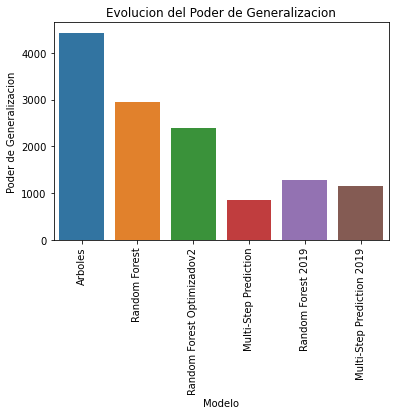

In [1115]:
dicc10={"Poder de Generalizacion":[Poder_Generalizacion2,Poder_Generalizacion1,Poder_Generalizacion32,Poder_Generalizacion5,Poder_Generalizacion4,Poder_Generalizacion6],"Modelo":["Arboles","Random Forest","Random Forest Optimizadov2","Multi-Step Prediction","Random Forest 2019","Multi-Step Prediction 2019"]}
resultados8=pd.DataFrame(dicc10)
resultados8
sns.barplot(data=resultados8,x="Modelo", y="Poder de Generalizacion")
plt.xticks(rotation = 90)
plt.title("Evolucion del Poder de Generalizacion")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Si bien podemos ver que los errores cuadraticos medios son menores con los modelos con los datos del 2019, podemos visualizar que el Poder de Generalizacion aumenta con respecto al mejor modelo que logre con todos los datos. Por lo que puedo concluir, que es mejor utilizar todos los datos dado que me ayuda a la generalizacion de nuestro resultado.

**Por lo que el modelo mas optimo que logre es el Modelo con todos los Datos 2017,2018 y 2019 con el Multi-Step Prediction.**

Para concluir, el modelo se podria mejorar incorporando algunas variables categoricas al modelo como el sentido, el metodo de pago dado que en Argentina esta cambiando y puede ser una variable clave y el tipo de vehiculo. Tambien realizar una optimizacion de Hiperparametros con una ventana movil, mejoraria el modelo. Otra cosa que probarìa es quitarle la estacionalidad a la serie de tiempo y evaluarla.

Ademas de agregar variables categoricas, probaria analizar mas en profundidad en el analisis exploratorio analizando sobre el contexto de cada año y si existen algunas normas que pueda cambiar nuestras conclusiones, por ejemplo en Argentina, Buenos Aires, Capital Federal, ya es obligatorio el pago mediante la modalidad online, lo que incluir la variable del metodo de pago, puede ser relevante para el analisis.